# Geopandas

Export motor traffic accident data during 2019 from Vegkart. Create a series of plots (on a map and descriptive statistics) to gain an understanding of the distribution of traffic accidents.

To install packages in Colaboratory use `!pip install`. You will need to run

```
!pip install geojson
!pip install git+https://github.com/alexdiem/nvdbapi-V3.git
```

In [4]:
import nvdbapiv3 as nvdb
from nvdbapiv3 import nvdb2geojson
import geopandas as gpd

In [5]:
"""5055 >= "2019-01-01" AND 5055 <= "2019-12-31"""

'5055 >= "2019-01-01" AND 5055 <= "2019-12-31'

In [6]:
q = nvdb.nvdbFagdata(570) # Trafikkulykke
q.filter({"egenskap": "5055 >= '2019-01-01' AND 5055 <= '2019-12-31'"})

In [7]:
q_geo = nvdb2geojson.fagdata2geojson(q)
qdf = gpd.GeoDataFrame.from_features(q_geo['features'])
qdf.set_crs(epsg=25833)

,geometry,"Geometri, punkt",Regulering gangfelt (Ny),Regulering vegkryss (Ny),UID (Ny),Ukedagstype (Ny),Ulykkestype (Ny),Ulykkestype underkategori (Ny),År (Ny),Antall Andre enheter (Ny),...,ÅDT (Ny),Vegbredde,Temperatur,sluttdato,kryssystem,sideanlegg,Historisk Meterverdi (Ny),Historisk Vegdelstrekning (Ny),Historisk Vegstrekning (Ny),Vinterdriftsklasse (Ny)
0,POINT Z (194869.846 6563773.057 74.170),POINT (194870 6563773),Ukjent,Ukjent,UID1000288953,Helgedøgn,Utforkjøring,Enslig kjøretøy kjørte utfor vegen,2019,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POINT Z (164965.843 6601083.479 36.475),POINT (164966 6601084),Ukjent,Ukjent,UID1000289224,Yrkesdøgn,Motsatt kjøreretning,Ulykke ved møting,2019,0,...,2300.0,7.1,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POINT Z (286566.866 6750951.694 153.510),POINT (286565 6750952),Ukjent,Ukjent,UID1000289227,Yrkesdøgn,Motsatt kjøreretning,Ulykke ved møting,2019,0,...,NaN,10.5,-3.0,2020-06-17,NaN,NaN,NaN,NaN,NaN,NaN
3,POINT Z (315510.820 6685118.750 141.522),POINT (315512 6685120),Ukjent,Ukjent,UID1000289230,Yrkesdøgn,Samme kjøreretning,Ulykke mellom kjøretøy med samme kjøreretning,2019,0,...,4800.0,6.9,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,POINT Z (338212.913 6705832.864 154.253),POINT (338215 6705834),Ukjent,Ukjent,UID1000289236,Yrkesdøgn,Fotgjenger/akende,Fotgjenger krysset kjørebanen,2019,0,...,5100.0,8.0,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,POINT Z (131293.740 6488863.157 16.594),POINT (131294 6488863),Ukjent,Ukjent,UID1000294603,Helgedøgn,Utforkjøring,Enslig kjøretøy kjørte utfor vegen,2019,0,...,1800.0,5.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3488,POINT Z (274453.849 6650297.345 161.576),POINT (274454 6650295),Ukjent,Ukjent,UID1000294605,Yrkesdøgn,Fotgjenger/akende,Fotgjenger krysset kjørebanen,2019,0,...,16225.0,17.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3489,POINT Z (261652.679 6649012.838 -35.451),POINT (261653 6649013),Ikke gangfelt,Ukjent,UID1000291265,Yrkesdøgn,Samme kjøreretning,Ulykke mellom kjøretøy med samme kjøreretning,2019,0,...,NaN,20.9,NaN,NaN,NaN,NaN,10111.0,1.0,55.0,Vinterdriftsklasse A
3490,POINT Z (260621.274 6649139.358 -2.847),POINT (260622 6649139),Ikke gangfelt,Ukjent,UID1000292556,Yrkesdøgn,Andre ulykker,Andre ulykker(parkering o.l),2019,0,...,NaN,20.0,NaN,NaN,NaN,NaN,4998.0,1.0,55.0,Vinterdriftsklasse A


In [8]:
qdf['fylke']

0       38
1       38
2       34
3       34
4       34
        ..
3487    42
3488    30
3489     3
3490     3
3491     3
Name: fylke, Length: 3492, dtype: int64

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='fylke', ylabel='Count'>

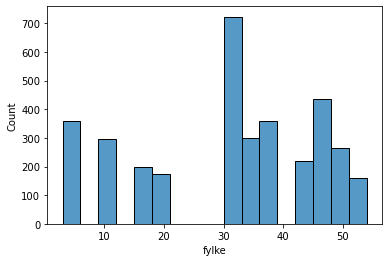

In [10]:
sns.histplot(data=qdf, x='fylke')

Add a column `ATK-punkt` to your accident dataset. In this column store the ID of the closest ATK point to this accident. Join the AKT-dataset onto the accident dataset using the IDs. Note that there must only be one geometry column!

In [11]:
p = nvdb.nvdbFagdata(162) # AKT-punkt

In [12]:
p_geo = nvdb2geojson.fagdata2geojson(p)
pdf = gpd.GeoDataFrame.from_features(p_geo['features'])
pdf.set_crs(epsg=25833)

,geometry,Id nummer,Navn,"Kamera, type","Kamera, installeringsår","Fartsmåler, type","Fartsmåler, installeringsår",Kontollretning,id,metadata,...,detaljnivå,typeVeg,typeVeg_sosi,startdato,kommune,fylke,Tilleggsinformasjon,"Geometri, punkt",Eier,Prosjektreferanse
0,POINT Z (6270.952 6859468.820 137.910),1440014,Naustdal Nord sg,Digital,2008.0,Axspeed,2017.0,Mot metreringsretning,78774532,"{'type': {'id': 162, 'navn': 'ATK-punkt'}, 've...",...,Vegtrase og kjørebane,Enkel bilveg,enkelBilveg,2021-12-08,4647,46,NaN,NaN,NaN,NaN
1,POINT Z (6270.952 6859468.820 137.910),1440015,Naustdal Nord ng,Digital,2004.0,Axspeed,2004.0,Med metreringsretning,78774535,"{'type': {'id': 162, 'navn': 'ATK-punkt'}, 've...",...,Vegtrase og kjørebane,Enkel bilveg,enkelBilveg,2021-12-08,4647,46,NaN,NaN,NaN,NaN
2,POINT Z (7192.522 6857708.300 76.190),1440012,Naustdal Sør sg,Digital,2009.0,Axspeed,2012.0,Mot metreringsretning,78774538,"{'type': {'id': 162, 'navn': 'ATK-punkt'}, 've...",...,Vegtrase og kjørebane,Enkel bilveg,enkelBilveg,2021-12-08,4647,46,NaN,NaN,NaN,NaN
3,POINT Z (7192.522 6857708.300 76.190),1440013,Naustdal Sør ng,Digital,2015.0,Axspeed,2014.0,Med metreringsretning,78774541,"{'type': {'id': 162, 'navn': 'ATK-punkt'}, 've...",...,Vegtrase og kjørebane,Enkel bilveg,enkelBilveg,2021-12-08,4647,46,NaN,NaN,NaN,NaN
4,POINT Z (59680.267 6776891.800 58.001),1440011,Gudvanga F1 VG.,Digital,2003.0,DR 410,2003.0,Med metreringsretning,78899305,"{'type': {'id': 162, 'navn': 'ATK-punkt'}, 've...",...,Vegtrase og kjørebane,Enkel bilveg,enkelBilveg,2021-12-08,4641,46,I tunnel,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,POINT Z (141601.678 6615716.583 179.726),0840052,Århus vestgående,hamatzu,NaN,Axspeed,NaN,Mot metreringsretning,1013540565,"{'type': {'id': 162, 'navn': 'ATK-punkt'}, 've...",...,Vegtrase og kjørebane,Enkel bilveg,enkelBilveg,2021-12-15,3820,38,NaN,NaN,"Stat, Statens vegvesen",NaN
408,POINT Z (145197.461 6622682.476 172.510),0840051,Gvammen vestgående,hamatzu,NaN,Axspeed,NaN,Mot metreringsretning,1013540566,"{'type': {'id': 162, 'navn': 'ATK-punkt'}, 've...",...,Vegtrase og kjørebane,Enkel bilveg,enkelBilveg,2021-12-15,3819,38,NaN,NaN,"Stat, Statens vegvesen",NaN
409,POINT Z (250679.591 6621949.038 34.619),240219,Oslofjordtunellen ankomst østg SATK,DATK,NaN,DR 410,NaN,Mot metreringsretning,1014080087,"{'type': {'id': 162, 'navn': 'ATK-punkt'}, 've...",...,Vegtrase og kjørebane,Enkel bilveg,enkelBilveg,2021-12-16,3025,30,NaN,POINT (250669.922025035 6621950.23011356),"Stat, Statens vegvesen",NaN
410,POINT Z (252551.325 6621424.676 -126.600),240220,"Oslofjordtunellen østg,beregning SATK",DATK,NaN,DR 410,NaN,Mot metreringsretning,1014080088,"{'type': {'id': 162, 'navn': 'ATK-punkt'}, 've...",...,Vegtrase og kjørebane,Enkel bilveg,enkelBilveg,2021-12-16,3025,30,NaN,POINT (252553.884388719 6621422.92206945),"Stat, Statens vegvesen",NaN


In [40]:
def nearest_point(point, df):
    mindist = 99999999
    minindex = -1
    for idx, row in df.iterrows():
        distance = point.distance(row.loc['geometry'])
        if distance < mindist:
            mindist = distance
            minindex = idx
    return mindist, minindex

In [51]:
qdf['AKT_punkt'] = qdf['geometry'].apply(lambda x: pdf.iloc[nearest_point(x, pdf)[1], 1])

In [52]:
qdf

,geometry,"Geometri, punkt",Regulering gangfelt (Ny),Regulering vegkryss (Ny),UID (Ny),Ukedagstype (Ny),Ulykkestype (Ny),Ulykkestype underkategori (Ny),År (Ny),Antall Andre enheter (Ny),...,Vegbredde,Temperatur,sluttdato,kryssystem,sideanlegg,Historisk Meterverdi (Ny),Historisk Vegdelstrekning (Ny),Historisk Vegstrekning (Ny),Vinterdriftsklasse (Ny),AKT_punkt
0,POINT Z (194869.846 6563773.057 74.170),POINT (194870 6563773),Ukjent,Ukjent,UID1000288953,Helgedøgn,Utforkjøring,Enslig kjøretøy kjørte utfor vegen,2019,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,842017
1,POINT Z (164965.843 6601083.479 36.475),POINT (164966 6601084),Ukjent,Ukjent,UID1000289224,Yrkesdøgn,Motsatt kjøreretning,Ulykke ved møting,2019,0,...,7.1,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0840052
2,POINT Z (286566.866 6750951.694 153.510),POINT (286565 6750952),Ukjent,Ukjent,UID1000289227,Yrkesdøgn,Motsatt kjøreretning,Ulykke ved møting,2019,0,...,10.5,-3.0,2020-06-17,NaN,NaN,NaN,NaN,NaN,NaN,440012
3,POINT Z (315510.820 6685118.750 141.522),POINT (315512 6685120),Ukjent,Ukjent,UID1000289230,Yrkesdøgn,Samme kjøreretning,Ulykke mellom kjøretøy med samme kjøreretning,2019,0,...,6.9,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24120
4,POINT Z (338212.913 6705832.864 154.253),POINT (338215 6705834),Ukjent,Ukjent,UID1000289236,Yrkesdøgn,Fotgjenger/akende,Fotgjenger krysset kjørebanen,2019,0,...,8.0,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,440011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487,POINT Z (131293.740 6488863.157 16.594),POINT (131294 6488863),Ukjent,Ukjent,UID1000294603,Helgedøgn,Utforkjøring,Enslig kjøretøy kjørte utfor vegen,2019,0,...,5.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,940121
3488,POINT Z (274453.849 6650297.345 161.576),POINT (274454 6650295),Ukjent,Ukjent,UID1000294605,Yrkesdøgn,Fotgjenger/akende,Fotgjenger krysset kjørebanen,2019,0,...,17.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3489,POINT Z (261652.679 6649012.838 -35.451),POINT (261653 6649013),Ikke gangfelt,Ukjent,UID1000291265,Yrkesdøgn,Samme kjøreretning,Ulykke mellom kjøretøy med samme kjøreretning,2019,0,...,20.9,NaN,NaN,NaN,NaN,10111.0,1.0,55.0,Vinterdriftsklasse A,340025
3490,POINT Z (260621.274 6649139.358 -2.847),POINT (260622 6649139),Ikke gangfelt,Ukjent,UID1000292556,Yrkesdøgn,Andre ulykker,Andre ulykker(parkering o.l),2019,0,...,20.0,NaN,NaN,NaN,NaN,4998.0,1.0,55.0,Vinterdriftsklasse A,340025
